In [36]:
import pandas as pd
import numpy as np  # For numerical operations if needed
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVR  # Support Vector Regression
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor # Gradient Boosting
from sklearn.metrics import mean_squared_error, r2_score

In [16]:
data = pd.read_excel("/home/destro/Downloads/Combine.xlsx", engine="openpyxl")
print(data.head(5))

      Price PropertyTitle  Location  Bedroom  Bathroom  Parking
0   7400000     Apartment  Kilimani      1.0       1.0      NaN
1   5900000     Apartment  Kilimani      1.0       1.0      NaN
2  18100000     Apartment  Kilimani      3.0       3.0      NaN
3  14150000     Apartment  Kilimani      3.0       3.0      NaN
4  10500000     Apartment  Kilimani      2.0       2.0      NaN


In [17]:
# a. Handle Missing Values (if any)
#  For demonstration, I'll fill missing numerical values with the mean and categorical with mode.  
# You should choose the strategy most appropriate for your data.
for col in data.select_dtypes(include=['number']).columns:
    data[col].fillna(data[col].mean(), inplace=True)

for col in data.select_dtypes(exclude=['number']).columns:
     data[col].fillna(data[col].mode()[0], inplace=True)  # Using mode for categorical

In [18]:
# b. Encode Categorical Features
# Decision trees in scikit-learn generally work with numerical data.
# We need to convert strings to numbers.  Label Encoding is used here.
label_encoder = LabelEncoder()

categorical_cols = ['PropertyTitle', 'Location'] # Add other categorical columns as needed.

for col in categorical_cols:
    data[col] = label_encoder.fit_transform(data[col])

In [19]:
# 3. Feature Selection and Target Variable
X = data.drop('Price', axis=1)  # Features (independent variables)
y = data['Price']  # Target variable (dependent variable)

In [21]:
# 4. Split Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) # 80% train, 20% test

In [23]:
# 5. Create and Train the Decision Tree Regressor
regressor = DecisionTreeRegressor(random_state=42) # You can adjust hyperparameters here (e.g., max_depth)
regressor.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [24]:
# 6. Make Predictions on the Test Set
y_pred = regressor.predict(X_test)

In [25]:
# 7. Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 259175267494829.97
R-squared: 0.9167877283335386


In [29]:
# 8. (Optional) Make Predictions on New Data
# Example:  You'll need to provide your new data in a DataFrame with the same structure as your training data.
new_data = pd.DataFrame({
    'PropertyTitle': [0], # Example: Encoded value, replace with the correct encoded value
    'Location': [1], # Example: Encoded value, replace with the correct encoded value
    'Bedroom': [3],
    'Bathroom': [2],
    'Parking': [1]
})

# Important: Preprocess new data in the same way as training data (encoding, handling missing values, etc.)
# ... (Preprocessing steps for new_data - similar to steps 2a and 2b) ...

new_predictions = regressor.predict(new_data)
print(f"Predictions for new data: {new_predictions}")

Predictions for new data: [11500000.]


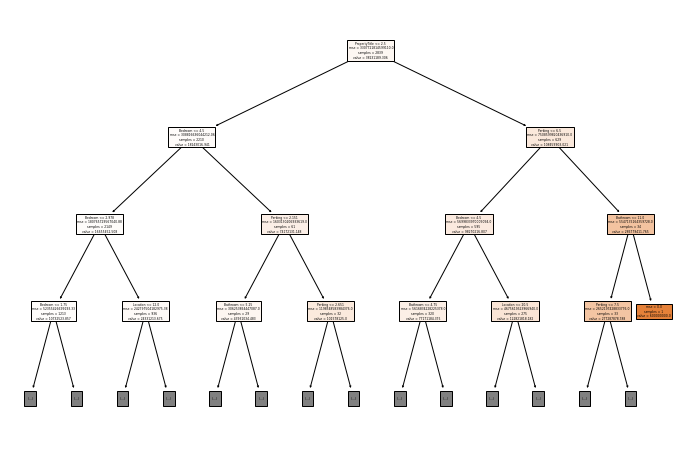

In [30]:
# 9. (Optional) Visualize the Decision Tree (for smaller trees)
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
plot_tree(regressor, filled=True, feature_names=X.columns,  max_depth=3) # Limit depth for visualization
plt.show()

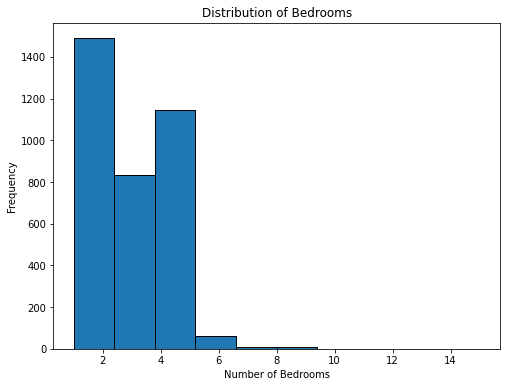

In [31]:
import matplotlib.pyplot as plt

# Histogram for Bedrooms
plt.figure(figsize=(8, 6)) 
plt.hist(data['Bedroom'], bins=10, edgecolor='black')  # Adjust 'bins' as needed
plt.xlabel("Number of Bedrooms")
plt.ylabel("Frequency")
plt.title("Distribution of Bedrooms")
plt.show()

# Repeat for Bathroom, Parking, and Price, adjusting labels accordingly

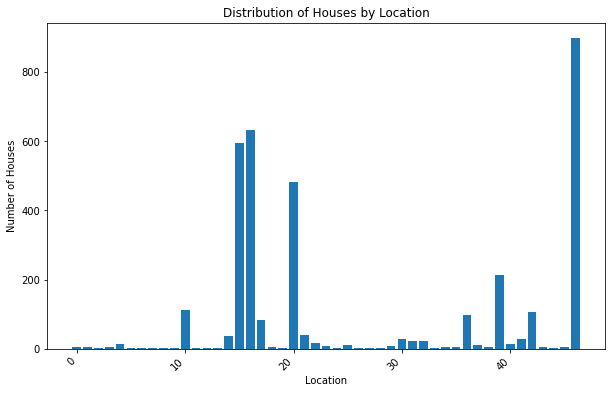

In [32]:
import matplotlib.pyplot as plt

# Bar chart for Location
location_counts = data['Location'].value_counts()
plt.figure(figsize=(10, 6))
plt.bar(location_counts.index, location_counts.values)
plt.xlabel("Location")
plt.ylabel("Number of Houses")
plt.title("Distribution of Houses by Location")
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels if needed
plt.show()

# Repeat for PropertyTitle

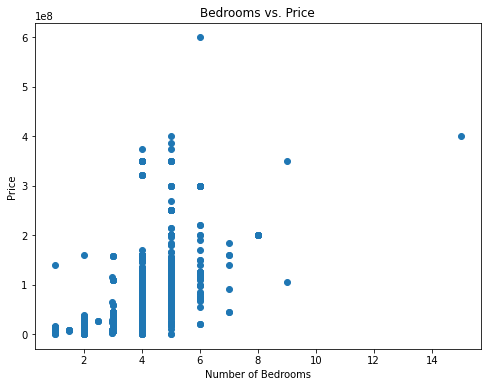

In [33]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(data['Bedroom'], data['Price'])
plt.xlabel("Number of Bedrooms")
plt.ylabel("Price")
plt.title("Bedrooms vs. Price")
plt.show()

# Repeat for Bathroom vs. Price and Parking vs. Price

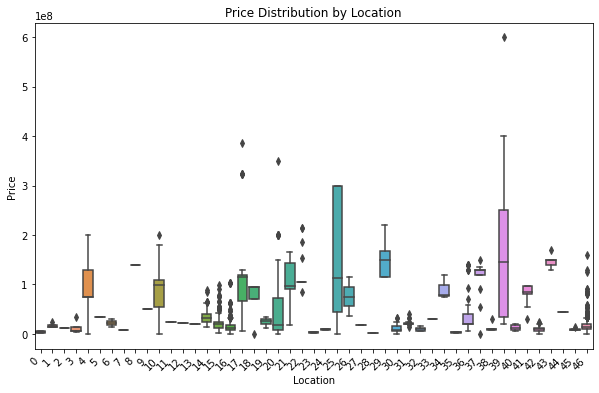

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.boxplot(x='Location', y='Price', data=data)
plt.xlabel("Location")
plt.ylabel("Price")
plt.title("Price Distribution by Location")
plt.xticks(rotation=45, ha='right')
plt.show()

# Repeat for Price by PropertyTitle

In [42]:

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Fit and transform training data
X_test_scaled = scaler.transform(X_test)      # Transform test data using the SAME scaler
# ... (Then use X_train_scaled and X_test_scaled in your SVR training and prediction)

In [38]:
# b. Gradient Boosting Regressor
gbr = GradientBoostingRegressor(random_state=42) # Tune hyperparameters like n_estimators, learning_rate, max_depth
param_grid_gbr = {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.5], 'max_depth': [3, 4, 5]}
grid_search_gbr = GridSearchCV(gbr, param_grid_gbr, cv=5, scoring='neg_mean_squared_error')
grid_search_gbr.fit(X_train, y_train) # No scaling needed for tree-based models but sometimes helps
best_gbr = grid_search_gbr.best_estimator_
y_pred_gbr = best_gbr.predict(X_test)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
r2_gbr = r2_score(y_test, y_pred_gbr)
print("\nGradient Boosting:")
print(f"MSE: {mse_gbr}")
print(f"R-squared: {r2_gbr}")


Gradient Boosting:
MSE: 495146945804212.6
R-squared: 0.8410253317481358


In [45]:
from sklearn.model_selection import GridSearchCV

param_grid_svr = {'C': [0.1, 1, 10, 100, 1000],  # Explore a wider range
                  'gamma': [1, 0.1, 0.01, 0.001, 0.0001], # Explore a wider range
                  'kernel': ['rbf']}  # or ['rbf', 'linear', 'poly'] if you want to test other kernels

grid_search_svr = GridSearchCV(SVR(), param_grid_svr, cv=5, scoring='neg_mean_squared_error', n_jobs=-1) # n_jobs=-1 to use all cores
grid_search_svr.fit(X_train_scaled, y_train)

best_svr = grid_search_svr.best_estimator_
# ... (Use best_svr for predictions)

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression  # Import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [47]:
# 2. Feature Scaling (Important for Linear Regression too)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
# 3. Train and Evaluate Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)  # Train on scaled data

LinearRegression()

In [49]:
y_pred_lr = lr.predict(X_test_scaled)
mse_lr = mean_squared_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("Linear Regression:")
print(f"MSE: {mse_lr}")

Linear Regression:
MSE: 4546771085408386.0
